Phân cụm phân cấp dựa trên các cột ApplicantIncome, CoapplicantIncome, LoanAmount, và Loan_Amount_Term.

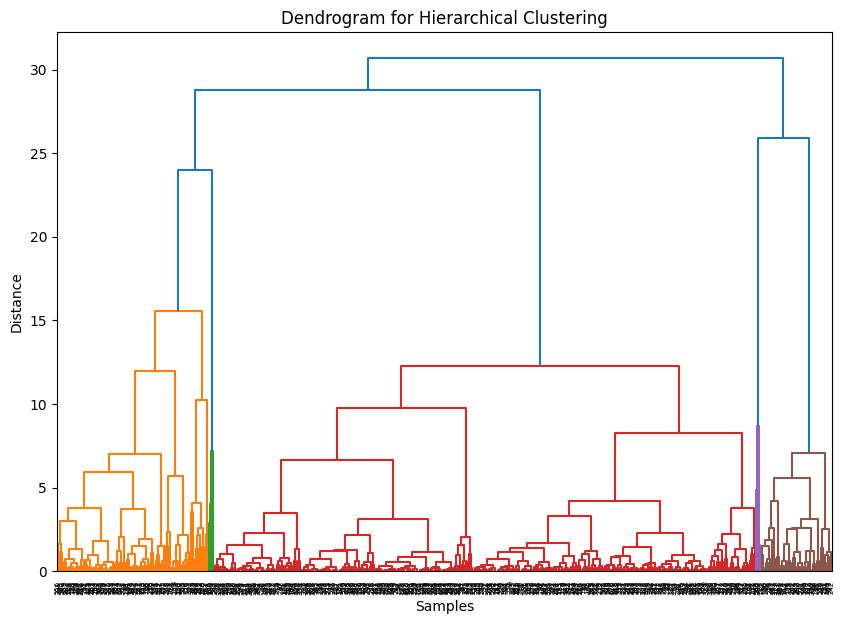

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  Cluster
1             4583             1508.0       128.0             360.0        3
2             3000                0.0        66.0             360.0        3
3             2583             2358.0       120.0             360.0        3
4             6000                0.0       141.0             360.0        3
5             5417             4196.0       267.0             360.0        4


C:\Users\admin\AppData\Local\Temp\ipykernel_36508\2459592349.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Cluster'] = cluster_labels


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt

# Bước 1: Đọc dữ liệu
file_path = r"D:\Kì 1 2024-2025\Kho và khai phá dl\Final\Train data final Kho.xlsx"
df = pd.read_excel(file_path, sheet_name='Train data final Kho')

# Bước 2: Lựa chọn các cột để phân cụm
columns_to_cluster = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
df_selected = df[columns_to_cluster]

# Bước 3: Xử lý giá trị thiếu (loại bỏ các hàng thiếu dữ liệu)
df_cleaned = df_selected.dropna()

# Bước 4: Chuẩn hóa dữ liệu
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_cleaned)

# Bước 5: Thực hiện phân cụm phân cấp
linked = linkage(data_scaled, method='ward')

# Bước 6: Vẽ biểu đồ dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=False)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

# Bước 7: Cắt cụm (ví dụ: chia thành 4 cụm)
num_clusters = 4
cluster_labels = fcluster(linked, num_clusters, criterion='maxclust')

# Bước 8: Gán nhãn cụm vào dữ liệu
df_cleaned['Cluster'] = cluster_labels

# Bước 9: Xuất kết quả
print(df_cleaned.head())  # Hiển thị dữ liệu sau khi phân cụm



In [ ]:
# Xuất kết quả phân cụm vào file Excel
output_path = r"D:\Kì 1 2024-2025\Kho và khai phá dl\Final\clustered_data.xlsx"
df_cleaned.to_excel(output_path, index=False)
print(f"Dữ liệu đã được lưu vào file: {output_path}")

Dữ liệu đã được lưu vào file: D:\Kì 1 2024-2025\Kho và khai phá dl\Final\clustered_data.xlsx


Phân tích cụm

In [ ]:
# Đọc file Excel với nhãn cụm đã gán
df_clustered = pd.read_excel(r"D:\Kì 1 2024-2025\Kho và khai phá dl\Final\clustered_data.xlsx")

# Xem các cụm và số lượng khách hàng trong mỗi cụm
print(df_clustered['Cluster'].value_counts())

# Tính toán các chỉ số thống kê cho từng cụm
cluster_stats = df_clustered.groupby('Cluster').mean()
print(cluster_stats)


Cluster
3    404
4    117
1     53
2      4
Name: count, dtype: int64
         ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term
Cluster                                                                  
1            4692.226415        1528.713207  115.622642        158.490566
2            1588.000000       28876.000000  195.500000        315.000000
3            3619.336634        1421.069604  118.368812        362.970297
4           12173.145299        1517.615385  259.128205        354.358974


=> groupby('Cluster').mean() sẽ cho thấy các đặc điểm trung bình của các cụm (ví dụ: thu nhập trung bình, số tiền vay trung bình, v.v.).

Phân cụm bằng Agglomerative Clustering

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.metrics import silhouette_score

# Đọc file Excel và chuẩn bị dữ liệu
file_path =  r"D:\Kì 1 2024-2025\Kho và khai phá dl\Final\Train data final Kho.xlsx"
df = pd.read_excel(file_path)

# Lựa chọn các cột liên quan để phân cụm
columns_to_cluster = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
df_cleaned = df[columns_to_cluster].dropna()

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_cleaned)





Phân cụm bằng Agglomerative Clustering

In [ ]:
# Sử dụng Agglomerative Clustering
agg_cluster = AgglomerativeClustering(n_clusters=4, linkage='ward')
agg_labels = agg_cluster.fit_predict(data_scaled)

# Gán nhãn cụm vào dữ liệu gốc
df_cleaned['Agglomerative_Cluster'] = agg_labels

Phân cụm bằng Hierarchical Clustering

In [ ]:
from scipy.cluster.hierarchy import linkage, fcluster

# Tạo dendrogram với phương pháp 'ward'
linked = linkage(data_scaled, method='ward')

# Cắt thành 4 cụm
hierarchical_labels = fcluster(linked, t=4, criterion='maxclust')

# Gán nhãn cụm vào dữ liệu gốc
df_cleaned['Hierarchical_Cluster'] = hierarchical_labels


So sánh hai thuật toán

Sử dụng Silhouette Score để so sánh chất lượng phân cụm của hai thuật toán. Silhouette Score đo độ chặt chẽ và tách biệt giữa các cụm. (Giá trị càng cao (gần 1) thì cụm càng tốt.)

In [ ]:
# Tính Silhouette Score
agg_silhouette = silhouette_score(data_scaled, agg_labels)
hier_silhouette = silhouette_score(data_scaled, hierarchical_labels)

print(f"Silhouette Score - Agglomerative Clustering: {agg_silhouette:.3f}")
print(f"Silhouette Score - Hierarchical Clustering: {hier_silhouette:.3f}")


Silhouette Score - Agglomerative Clustering: 0.480
Silhouette Score - Hierarchical Clustering: 0.480


In [ ]:
# Xuất kết quả ra file Excel để so sánh
output_path = '/mnt/data/comparison_clusters.xlsx'
df_cleaned.to_excel(output_path, index=False)
print(f"Kết quả phân cụm đã được lưu vào: {output_path}")


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, fcluster

# Đọc file Excel và chuẩn bị dữ liệu
file_path = r"D:\Kì 1 2024-2025\Kho và khai phá dl\Final\Train data final Kho.xlsx"
df = pd.read_excel(file_path)

# Lựa chọn các cột liên quan để phân cụm
columns_to_cluster = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
df_cleaned = df[columns_to_cluster].dropna()

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_cleaned)


Phân cụm bằng DBSCAN

In [ ]:
# Sử dụng DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=10)  # eps và min_samples cần được điều chỉnh phù hợp, điều chỉnh dựa trên khoảng cách giữa các điểm và số lượng điểm tối thiểu trong một cụm.
dbscan_labels = dbscan.fit_predict(data_scaled)

# Gán nhãn cụm vào dữ liệu
df_cleaned['DBSCAN_Cluster'] = dbscan_labels


In [ ]:
# Kiểm tra số lượng cụm (không bao gồm nhiễu)
unique_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)

if unique_clusters > 1:
    dbscan_silhouette = silhouette_score(
        data_scaled[df_cleaned['DBSCAN_Cluster'] != -1],
        dbscan_labels[df_cleaned['DBSCAN_Cluster'] != -1]
    )
    print(f"Silhouette Score - DBSCAN: {dbscan_silhouette:.3f}")
else:
    print("DBSCAN chỉ tạo ra một cụm sau khi loại bỏ nhiễu. Hãy điều chỉnh eps và min_samples.")


Silhouette Score - DBSCAN: 0.650


In [ ]:
from collections import Counter
print("Phân phối cụm (bao gồm cả nhiễu):", Counter(dbscan_labels))


Phân phối cụm (bao gồm cả nhiễu): Counter({np.int64(0): 435, np.int64(-1): 121, np.int64(1): 13, np.int64(2): 9})


In [ ]:
# Tính Silhouette Score cho cả hai thuật toán
dbscan_silhouette = silhouette_score(data_scaled[df_cleaned['DBSCAN_Cluster'] != -1], dbscan_labels[df_cleaned['DBSCAN_Cluster'] != -1])
hier_silhouette = silhouette_score(data_scaled, hierarchical_labels)

print(f"Silhouette Score - DBSCAN: {dbscan_silhouette:.3f}")
print(f"Silhouette Score - Hierarchical Clustering: {hier_silhouette:.3f}")


Silhouette Score - DBSCAN: 0.650
Silhouette Score - Hierarchical Clustering: 0.480


=> Thuật toán DBSCAN tối ưu hơn

In [ ]:
# Xuất kết quả ra file Excel
output_path = '/mnt/data/dbscan_vs_hierarchical.xlsx'
df_cleaned.to_excel(output_path, index=False)
print(f"Kết quả phân cụm đã được lưu vào: {output_path}")
